In [41]:
import pandas as pd
import os

# Define the file path
file_path = r"C:\Users\Adminlabpc-02\Downloads\Database\Cats"

# Check if the path exists
if not os.path.exists(file_path):
    print(f"Error: Path not found at {file_path}")
else:
    # Check if the path is a directory
    if os.path.isdir(file_path):
        print(f"Error: The path {file_path} is a directory, not a file.")
        print("Listing files in the directory:")
        try:
            files = os.listdir(file_path)
            for file in files:
                print(f"- {file}")
            print("\nPlease specify the full path to the desired file (e.g., C:\\Users\\Adminlabpc-02\\Downloads\\Database\\Cats\\filename.csv).")
        except PermissionError:
            print(f"Error: Permission denied when accessing directory {file_path}.")
            print("Try running VS Code as Administrator or checking file permissions.")
    else:
        # Try to read the file (assuming CSV; adjust if needed)
        try:
            df = pd.read_csv(file_path)
            
            # Display the first few rows of the database
            print("Cat Database Contents:")
            display(df.head())  # Use display for nicer output in Jupyter
            
            # Display basic information about the dataset
            print("\nDataset Info:")
            print(df.info())
            
        except PermissionError:
            print(f"Error: Permission denied when accessing file {file_path}.")
            print("Try the following:")
            print("1. Run VS Code as Administrator.")
            print("2. Check file permissions (right-click file > Properties > Security).")
            print("3. Ensure the file is not open in another program.")
            print("4. Verify the file path is correct.")
        except Exception as e:
            print(f"Error reading the file: {str(e)}")
            print("Ensure the file is a valid CSV or specify the correct file format (e.g., .xlsx, .json).")

Error: The path C:\Users\Adminlabpc-02\Downloads\Database\Cats is a directory, not a file.
Listing files in the directory:
- cats
- CAT_00
- CAT_01
- CAT_02
- CAT_03
- CAT_04
- CAT_05
- CAT_06

Please specify the full path to the desired file (e.g., C:\Users\Adminlabpc-02\Downloads\Database\Cats\filename.csv).


In [42]:
import os
from pathlib import Path

# Define the root directory
root_path = r"C:\Users\Adminlabpc-02\Downloads\Database\Cats"

# Common image file extensions
image_extensions = {'.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tiff'}

def count_images_in_directory(directory_path):
    """Count image files in the given directory."""
    try:
        image_count = 0
        for file in os.listdir(directory_path):
            if os.path.isfile(os.path.join(directory_path, file)):
                if Path(file).suffix.lower() in image_extensions:
                    image_count += 1
        return image_count
    except PermissionError:
        return f"Permission denied for {directory_path}"
    except Exception as e:
        return f"Error for {directory_path}: {str(e)}"

def main():
    # Check if the root path exists
    if not os.path.exists(root_path):
        print(f"Error: Directory not found at {root_path}")
        return

    # Initialize total image count
    total_images = 0

    # List of directories and files to check
    items = ['cats', 'CAT_00', 'CAT_01', 'CAT_02', 'CAT_03', 'CAT_04', 'CAT_05', 'CAT_06']
    print("Image Counts:")
    print("-" * 50)

    for item in items:
        item_path = os.path.join(root_path, item)
        
        if os.path.isdir(item_path):
            # Count images in directory
            result = count_images_in_directory(item_path)
            if isinstance(result, int):
                print(f"{item}: {result} images")
                total_images += result
            else:
                print(f"{item}: {result}")
        elif os.path.isfile(item_path):
            # Check if the file is an image
            if Path(item_path).suffix.lower() in image_extensions:
                print(f"{item}: 1 image (single image file)")
                total_images += 1
            else:
                print(f"{item}: 0 images (not an image file)")
        else:
            print(f"{item}: Not found or inaccessible")

    print("-" * 50)
    print(f"Total Images: {total_images}")

if __name__ == "__main__":
    main()

Image Counts:
--------------------------------------------------
cats: 0 images
CAT_00: 1706 images
CAT_01: 1618 images
CAT_02: 1757 images
CAT_03: 811 images
CAT_04: 1396 images
CAT_05: 1321 images
CAT_06: 1388 images
--------------------------------------------------
Total Images: 9997


Processing Images:
--------------------------------------------------
CAT_00: Processed 1706, Failed 0


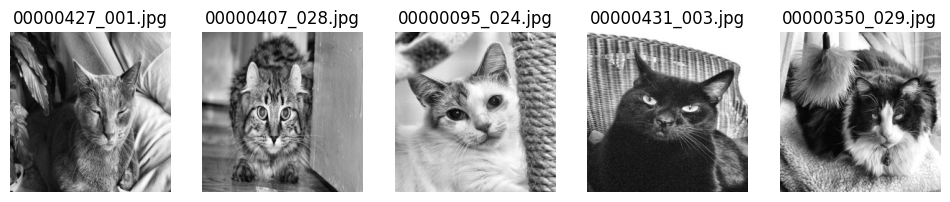

CAT_01: Processed 1618, Failed 0


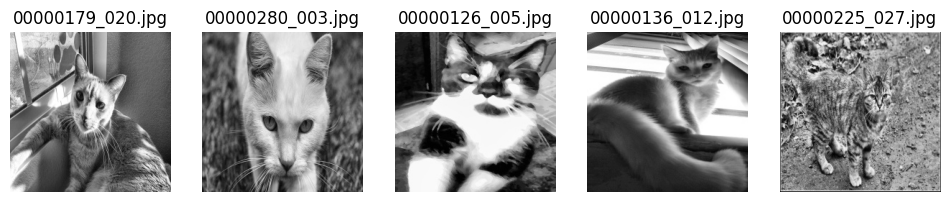

CAT_02: Processed 1757, Failed 0


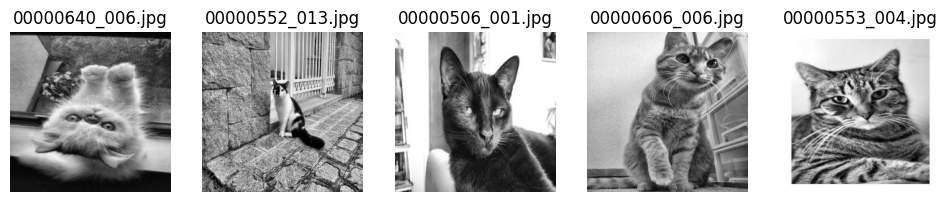

CAT_03: Processed 811, Failed 0


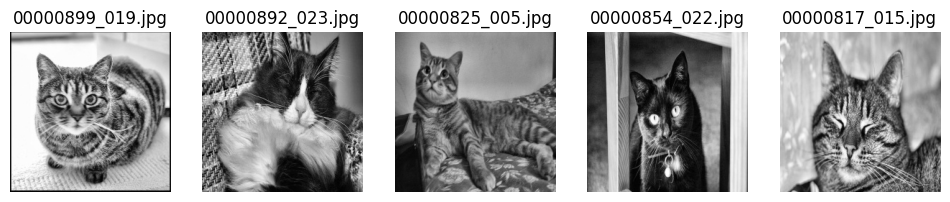

CAT_04: Processed 1396, Failed 0


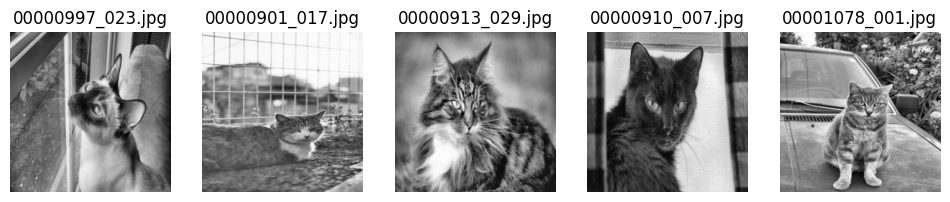

CAT_05: Processed 1321, Failed 0


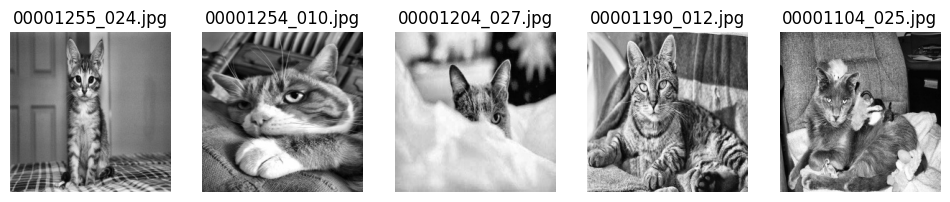

CAT_06: Processed 1388, Failed 0


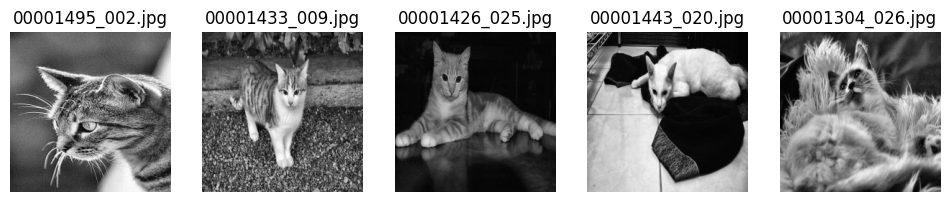

--------------------------------------------------
Summary: Total Processed = 9997, Total Failed = 0


In [44]:
import os
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from pathlib import Path
import random

# Define paths
input_root = r"C:\Users\Adminlabpc-02\Downloads\Database\Cats"
output_root = r"C:\Users\Adminlabpc-02\Downloads\Database\Processed_Cats"

# Target image size
TARGET_SIZE = (224, 224)

# Supported image extensions
IMAGE_EXTENSIONS = {'.jpg', '.jpeg', '.png', '.bmp', '.tiff'}

# Function to display processed images
def display_sample_images(folder, num_images=5):
    """Display a few random processed images from the output folder."""
    image_files = [file for file in os.listdir(folder) if Path(file).suffix.lower() in IMAGE_EXTENSIONS]
    if len(image_files) == 0:
        print("No images found in this folder.")
        return

    # Randomly select 'num_images' files
    sample_files = random.sample(image_files, min(num_images, len(image_files)))

    # Set up the plot
    plt.figure(figsize=(12, 8))
    
    for i, file in enumerate(sample_files):
        image_path = os.path.join(folder, file)
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB for display

        plt.subplot(1, num_images, i + 1)
        plt.imshow(image)
        plt.axis('off')
        plt.title(file)
    
    plt.show()

# Rest of your code...

def main():
    # Create output directory
    if not create_output_directory():
        return

    # List of directories to process
    directories = ['CAT_00', 'CAT_01', 'CAT_02', 'CAT_03', 'CAT_04', 'CAT_05', 'CAT_06']
    
    total_processed = 0
    total_failed = 0

    print("Processing Images:")
    print("-" * 50)

    for folder in directories:
        input_folder = os.path.join(input_root, folder)
        output_folder = os.path.join(output_root, folder)

        if not os.path.exists(input_folder):
            print(f"{folder}: Directory not found")
            continue

        try:
            processed = 0
            failed = 0
            for file in os.listdir(input_folder):
                input_path = os.path.join(input_folder, file)
                if not os.path.isfile(input_path):
                    continue

                # Check if it's an image
                if Path(file).suffix.lower() not in IMAGE_EXTENSIONS:
                    continue

                # Verify image integrity
                if not is_valid_image(input_path):
                    failed += 1
                    total_failed += 1
                    continue

                # Define output path
                output_path = os.path.join(output_folder, file)

                # Process image
                success, message = process_image(input_path, output_path)
                if success:
                    processed += 1
                    total_processed += 1
                else:
                    failed += 1
                    total_failed += 1
                    print(f"{folder}/{file}: {message}")

            print(f"{folder}: Processed {processed}, Failed {failed}")
            
            # After processing, display sample images
            display_sample_images(output_folder)

        except PermissionError:
            print(f"{folder}: Permission denied. Run VS Code as Administrator or check permissions.")
        except Exception as e:
            print(f"{folder}: Error: {str(e)}")

    print("-" * 50)
    print(f"Summary: Total Processed = {total_processed}, Total Failed = {total_failed}")

if __name__ == "__main__":
    main()

In [45]:
from torch.utils.data import random_split

# Split into 70% train, 15% val, 15% test
total_size = len(dataset)
train_size = int(0.7 * total_size)
val_size = int(0.15 * total_size)
test_size = total_size - train_size - val_size

train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)


In [46]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = models.resnet18(pretrained=True)
num_classes = len(dataset.classes)
model.fc = nn.Linear(model.fc.in_features, num_classes)
model = model.to(device)


c:\Users\Adminlabpc-02\AppData\Local\Programs\Python\Python38\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Adminlabpc-02\AppData\Local\Programs\Python\Python38\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [47]:
# Loss function
criterion = nn.CrossEntropyLoss()

# Optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [48]:
num_epochs = 10  # Define the number of epochs

for epoch in range(num_epochs):
    model.train()  # Set model to training mode
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()  # Zero the parameter gradients
        outputs = model(images)  # Forward pass
        loss = criterion(outputs, labels)  # Compute loss
        loss.backward()  # Backward pass
        optimizer.step()  # Update model weights

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)  # Get predicted class
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_acc = 100 * correct / total
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss:.4f}, Train Accuracy: {train_acc:.2f}%")

    # Validation phase
    model.eval()  # Set model to evaluation mode
    correct = 0
    total = 0
    with torch.no_grad():  # No gradient computation during validation
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)

            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_acc = 100 * correct / total
    print(f"Validation Accuracy: {val_acc:.2f}%")


Epoch [1/10], Loss: 879.0487, Train Accuracy: 16.19%
Validation Accuracy: 16.28%
Epoch [2/10], Loss: 859.3519, Train Accuracy: 16.61%
Validation Accuracy: 16.74%
Epoch [3/10], Loss: 856.6359, Train Accuracy: 16.46%
Validation Accuracy: 17.28%
Epoch [4/10], Loss: 852.7409, Train Accuracy: 17.24%
Validation Accuracy: 17.08%
Epoch [5/10], Loss: 849.9797, Train Accuracy: 17.15%
Validation Accuracy: 13.54%
Epoch [6/10], Loss: 850.5470, Train Accuracy: 17.11%
Validation Accuracy: 15.48%
Epoch [7/10], Loss: 849.8910, Train Accuracy: 16.91%
Validation Accuracy: 17.34%
Epoch [8/10], Loss: 850.7783, Train Accuracy: 17.01%
Validation Accuracy: 13.08%
Epoch [9/10], Loss: 847.1942, Train Accuracy: 16.95%
Validation Accuracy: 17.81%
Epoch [10/10], Loss: 845.5153, Train Accuracy: 17.26%
Validation Accuracy: 16.08%


In [49]:
import matplotlib.pyplot as plt

# Lists to store accuracy and loss
train_accuracies = []
val_accuracies = []
train_losses = []

num_epochs = 10

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_acc = 100 * correct / total
    train_losses.append(running_loss)
    train_accuracies.append(train_acc)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss:.4f}, Train Accuracy: {train_acc:.2f}%")

    # Validation
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_acc = 100 * correct / total
    val_accuracies.append(val_acc)
    print(f"Validation Accuracy: {val_acc:.2f}%")


Epoch [1/10], Loss: 844.0866, Train Accuracy: 17.46%
Validation Accuracy: 16.48%
Epoch [2/10], Loss: 844.1853, Train Accuracy: 17.64%
Validation Accuracy: 17.28%
Epoch [3/10], Loss: 844.3273, Train Accuracy: 17.38%
Validation Accuracy: 15.54%
Epoch [4/10], Loss: 842.5669, Train Accuracy: 17.46%
Validation Accuracy: 16.74%
Epoch [5/10], Loss: 841.8147, Train Accuracy: 17.44%
Validation Accuracy: 15.94%
Epoch [6/10], Loss: 842.0406, Train Accuracy: 17.39%
Validation Accuracy: 16.48%
Epoch [7/10], Loss: 841.1954, Train Accuracy: 17.56%
Validation Accuracy: 17.21%
Epoch [8/10], Loss: 841.5570, Train Accuracy: 17.22%
Validation Accuracy: 15.74%
Epoch [9/10], Loss: 839.9461, Train Accuracy: 17.92%
Validation Accuracy: 15.41%
Epoch [10/10], Loss: 840.1319, Train Accuracy: 17.59%
Validation Accuracy: 16.41%


In [50]:
import torchvision.transforms as transforms

# Define transformations for the training and validation sets
transform = transforms.Compose([
    transforms.Resize((128, 128)),  # Resize images to a fixed size
    transforms.ToTensor(),          # Convert images to tensors
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize
])

In [61]:
torch.save(model.state_dict(), "cat_classifier.pth")
print("Model saved.")


Model saved.


In [62]:
# Create the model structure again
model = models.resnet18(pretrained=True)
num_classes = len(dataset.classes)
model.fc = nn.Linear(model.fc.in_features, num_classes)

# Load the saved model weights
model.load_state_dict(torch.load("cat_classifier.pth"))
model.eval()  # Set to evaluation mode
print("Model loaded and ready for inference.")


Model loaded and ready for inference.


C:\Users\Adminlabpc-02\AppData\Local\Temp\ipykernel_57728\4172471585.py:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("cat_classifier.pth

In [74]:
import os

# Path to your data directory
data_dir = r'C:\Users\Adminlabpc-02\Downloads\Database\Cat Diseases'

# Disease-Symptom mapping (you can extend this dictionary as needed)
disease_symptoms = {
    'Cat Ringworm.v10i.paligemma': ['Circular patches of hair loss', 'Itchy skin', 'Redness', 'Scaling'],
    'cat ringworm.v1i.paligemma': ['Hair loss', 'Redness', 'Rash'],
    'cat ringworm.v2i.paligemma': ['Itching', 'Scaly patches'],
    'Cat Ringworm.v2i.paligemma (1)': ['Lesions', 'Redness', 'Hair loss'],
    'cat ringworm.v3i.paligemma': ['Dry skin', 'Bald patches'],
    'Cat Ringworm.v4-2024-11-14-10-14am.paligemma': ['Crusty patches', 'Hair thinning'],
    'Cat Ringworm.v9i.paligemma': ['Patches of hair loss', 'Scabs'],
    'CatBot Baru.v2i.paligemma': ['Fever', 'Lethargy', 'Loss of appetite'],
    'CatBot Baru.v4i.paligemma': ['Cough', 'Sore throat', 'Loss of appetite'],
    'CatBot Baru.v5i.paligemma': ['Fatigue', 'Vomiting', 'Loss of appetite'],
    'CatBot Baru.v7i.paligemma': ['Respiratory issues', 'Coughing', 'Sneezing'],
    'Diseases': ['General symptoms, no specific disease'],
}

# Initialize variables to count images
image_count = 0
class_count = 0

# Loop through each subdirectory (class) and count the images
for class_name in os.listdir(data_dir):
    class_path = os.path.join(data_dir, class_name)
    
    # Check if it is a directory (class folder)
    if os.path.isdir(class_path):
        class_count += 1
        print(f"Found class: {class_name} ({class_path})")
        
        # Display the symptoms for this class (if available in the dictionary)
        symptoms = disease_symptoms.get(class_name, "Symptoms not found")
        print(f"Symptoms for {class_name}: {symptoms}")
        
        # Count images in the current class directory
        for root, dirs, files in os.walk(class_path):  # os.walk will search all levels inside the folder
            for file_name in files:
                # Check if the file is an image (you can add more file extensions if needed)
                if file_name.lower().endswith(('.png', '.jpg', '.jpeg')):
                    image_count += 1
                    # Optional: To debug, print out the file names
                    # print(f"Found image: {file_name}")

# Output the results
print(f'Total number of classes: {class_count}')
print(f'Total number of images: {image_count}')


Found class: Cat Ringworm.v10i.paligemma (C:\Users\Adminlabpc-02\Downloads\Database\Cat Diseases\Cat Ringworm.v10i.paligemma)
Symptoms for Cat Ringworm.v10i.paligemma: ['Circular patches of hair loss', 'Itchy skin', 'Redness', 'Scaling']
Found class: cat ringworm.v1i.paligemma (C:\Users\Adminlabpc-02\Downloads\Database\Cat Diseases\cat ringworm.v1i.paligemma)
Symptoms for cat ringworm.v1i.paligemma: ['Hair loss', 'Redness', 'Rash']
Found class: cat ringworm.v2i.paligemma (C:\Users\Adminlabpc-02\Downloads\Database\Cat Diseases\cat ringworm.v2i.paligemma)
Symptoms for cat ringworm.v2i.paligemma: ['Itching', 'Scaly patches']
Found class: Cat Ringworm.v2i.paligemma (1) (C:\Users\Adminlabpc-02\Downloads\Database\Cat Diseases\Cat Ringworm.v2i.paligemma (1))
Symptoms for Cat Ringworm.v2i.paligemma (1): ['Lesions', 'Redness', 'Hair loss']
Found class: cat ringworm.v3i.paligemma (C:\Users\Adminlabpc-02\Downloads\Database\Cat Diseases\cat ringworm.v3i.paligemma)
Symptoms for cat ringworm.v3i.pal

Training images shape: (8863, 50176)
Test images shape: (2216, 50176)
Training labels shape: (8863, 12)
Test labels shape: (2216, 12)

Success and Failure Counts per Class:
Cat Ringworm.v10i.paligemma - Success: 1088, Failure: 0
cat ringworm.v1i.paligemma - Success: 295, Failure: 0
cat ringworm.v2i.paligemma - Success: 294, Failure: 0
Cat Ringworm.v2i.paligemma (1) - Success: 1231, Failure: 0
cat ringworm.v3i.paligemma - Success: 278, Failure: 0
Cat Ringworm.v4-2024-11-14-10-14am.paligemma - Success: 782, Failure: 0
Cat Ringworm.v9i.paligemma - Success: 1158, Failure: 0
CatBot Baru.v2i.paligemma - Success: 1122, Failure: 0
CatBot Baru.v4i.paligemma - Success: 742, Failure: 0
CatBot Baru.v5i.paligemma - Success: 1887, Failure: 0
CatBot Baru.v7i.paligemma - Success: 1907, Failure: 0
Diseases - Success: 295, Failure: 0


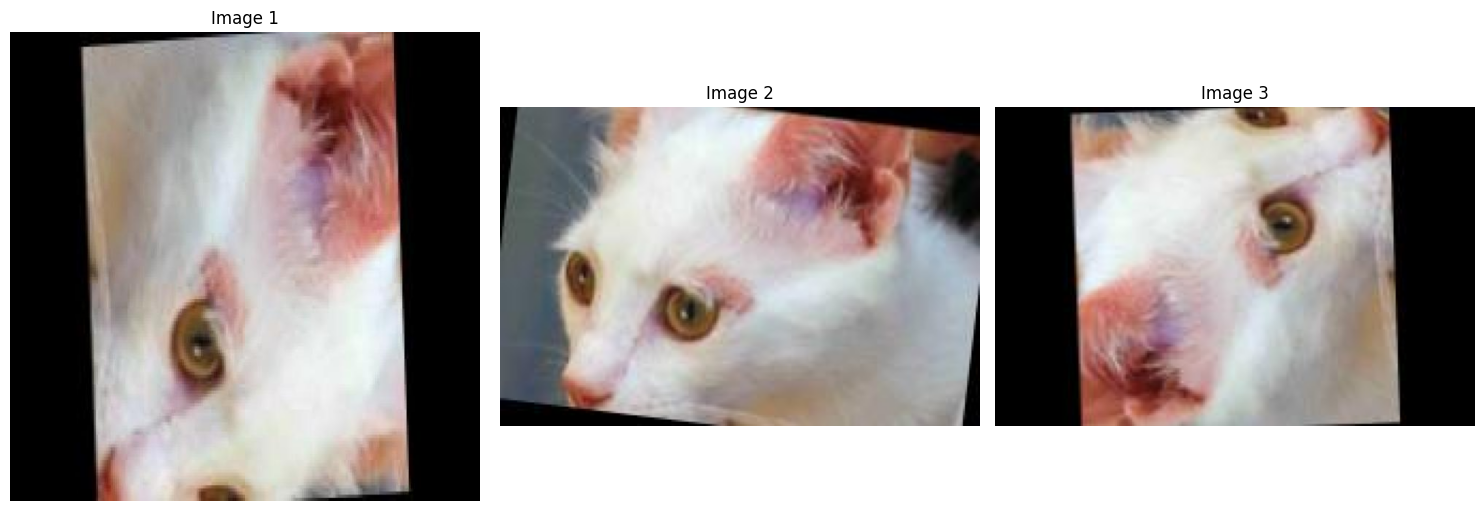

In [83]:
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from PIL import Image
import matplotlib.pyplot as plt

# Path to your data directory
data_dir = r'C:\Users\Adminlabpc-02\Downloads\Database\Cat Diseases'

# Resize dimensions
target_size = (224, 224)

# Initialize lists for images and labels
images = []
labels = []

# Disease-Symptom mapping (you can extend this dictionary as needed)
disease_symptoms = {
    'Cat Ringworm.v10i.paligemma': ['Circular patches of hair loss', 'Itchy skin', 'Redness', 'Scaling'],
    'cat ringworm.v1i.paligemma': ['Hair loss', 'Redness', 'Rash'],
    'cat ringworm.v2i.paligemma': ['Itching', 'Scaly patches'],
    'Cat Ringworm.v2i.paligemma (1)': ['Lesions', 'Redness', 'Hair loss'],
    'cat ringworm.v3i.paligemma': ['Dry skin', 'Bald patches'],
    'Cat Ringworm.v4-2024-11-14-10-14am.paligemma': ['Crusty patches', 'Hair thinning'],
    'Cat Ringworm.v9i.paligemma': ['Patches of hair loss', 'Scabs'],
    'CatBot Baru.v2i.paligemma': ['Fever', 'Lethargy', 'Loss of appetite'],
    'CatBot Baru.v4i.paligemma': ['Cough', 'Sore throat', 'Loss of appetite'],
    'CatBot Baru.v5i.paligemma': ['Fatigue', 'Vomiting', 'Loss of appetite'],
    'CatBot Baru.v7i.paligemma': ['Respiratory issues', 'Coughing', 'Sneezing'],
    'Diseases': ['General symptoms, no specific disease'],
}

# Initialize counters for success and failure tracking per class
success_count = {class_name: 0 for class_name in disease_symptoms.keys()}
failure_count = {class_name: 0 for class_name in disease_symptoms.keys()}

# Process each class (folder) and its images
for class_name in os.listdir(data_dir):
    class_path = os.path.join(data_dir, class_name)

    if os.path.isdir(class_path):
        # Add corresponding symptoms
        symptoms = disease_symptoms.get(class_name, ["Symptoms not found"])

        # Loop through each image in the directory
        for root, dirs, files in os.walk(class_path):
            for file_name in files:
                if file_name.lower().endswith(('.png', '.jpg', '.jpeg')):

                    try:
                        # Load the image
                        img_path = os.path.join(root, file_name)
                        image = Image.open(img_path)
                        
                        # Resize image to target size
                        image = image.resize(target_size)
                        
                        # Convert to numpy array
                        image = np.array(image)
                        
                        # Convert to grayscale (optional, based on your need)
                        if len(image.shape) == 3:  # RGB
                            image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

                        # Apply Gaussian Blur Removal (to reduce blur)
                        # Invert image for sharpening effect
                        kernel = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])  # Sharpening kernel
                        image = cv2.filter2D(image, -1, kernel)
                        
                        # Normalize image (scale pixel values between 0 and 1)
                        image = image.astype("float32") / 255.0

                        # Flatten the image (optional based on your model)
                        image = image.flatten()

                        # Add image and label to lists
                        images.append(image)
                        labels.append(class_name)

                        # Increment success counter for this class
                        success_count[class_name] += 1

                    except Exception as e:
                        # Increment failure counter for this class if error occurs
                        failure_count[class_name] += 1
                        print(f"Error processing image {file_name} in class {class_name}: {e}")

# Convert labels to numeric values
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

# Convert labels to categorical (one-hot encoding) for classification
labels = to_categorical(labels)

# Convert images list to numpy array
images = np.array(images)

# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Print out the dataset shape
print(f"Training images shape: {X_train.shape}")
print(f"Test images shape: {X_test.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Test labels shape: {y_test.shape}")

# Print the success and failure counts per class
print("\nSuccess and Failure Counts per Class:")
for class_name in disease_symptoms.keys():
    print(f"{class_name} - Success: {success_count[class_name]}, Failure: {failure_count[class_name]}")

# Show 3 images: One from the first class and two from other classes
image_paths_to_show = []

# Find one image from the first class (Cat Ringworm.v10i.paligemma)
first_class_name = 'Cat Ringworm.v10i.paligemma'
first_class_image_path = None
for root, dirs, files in os.walk(os.path.join(data_dir, first_class_name)):
    for file_name in files:
        if file_name.lower().endswith(('.png', '.jpg', '.jpeg')):
            first_class_image_path = os.path.join(root, file_name)
            image_paths_to_show.append(first_class_image_path)
            break
    if len(image_paths_to_show) == 1:
        break

# Find two images from other classes
for class_name in disease_symptoms.keys():
    if class_name != first_class_name:
        for root, dirs, files in os.walk(os.path.join(data_dir, class_name)):
            for file_name in files:
                if file_name.lower().endswith(('.png', '.jpg', '.jpeg')) and len(image_paths_to_show) < 3:
                    image_paths_to_show.append(os.path.join(root, file_name))
                    if len(image_paths_to_show) == 3:
                        break
            if len(image_paths_to_show) == 3:
                break
    if len(image_paths_to_show) == 3:
        break

# Display the 3 selected images
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, image_path in enumerate(image_paths_to_show):
    image = Image.open(image_path)
    axes[i].imshow(image)
    axes[i].set_title(f"Image {i + 1}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()


Epoch 1/10
277/277 [==============================] - 240s 860ms/step - loss: 2.1647 - accuracy: 0.2014 - val_loss: 1.9533 - val_accuracy: 0.2356
Epoch 2/10
277/277 [==============================] - 234s 843ms/step - loss: 1.8364 - accuracy: 0.2891 - val_loss: 1.7722 - val_accuracy: 0.2744
Epoch 3/10
277/277 [==============================] - 234s 846ms/step - loss: 1.6607 - accuracy: 0.3300 - val_loss: 1.6928 - val_accuracy: 0.2744
Epoch 4/10
277/277 [==============================] - 234s 844ms/step - loss: 1.5222 - accuracy: 0.3691 - val_loss: 1.6536 - val_accuracy: 0.2671
Epoch 5/10
277/277 [==============================] - 232s 836ms/step - loss: 1.4181 - accuracy: 0.4004 - val_loss: 1.6688 - val_accuracy: 0.2671
Epoch 6/10
277/277 [==============================] - 230s 831ms/step - loss: 1.3405 - accuracy: 0.4275 - val_loss: 1.6664 - val_accuracy: 0.2550
Epoch 7/10
277/277 [==============================] - 231s 834ms/step - loss: 1.2561 - accuracy: 0.4596 - val_loss: 1.6911 -

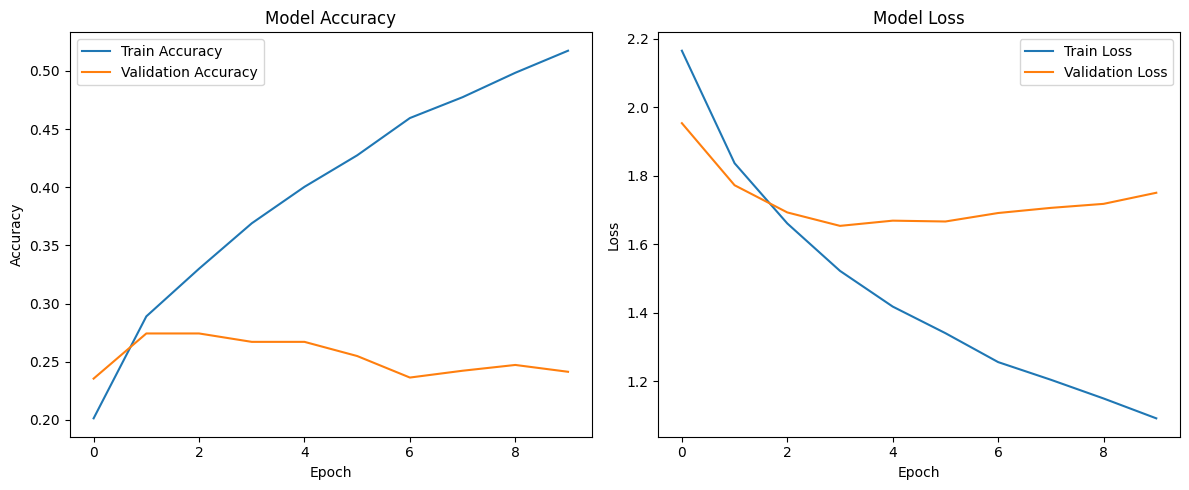

In [85]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt

# 1. Reshape flattened grayscale images back to 224x224x1
X_train = X_train.reshape(-1, 224, 224, 1)
X_test = X_test.reshape(-1, 224, 224, 1)

# 2. Build CNN model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 1)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(y_train.shape[1], activation='softmax')  # output layer
])

# 3. Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 4. Train the model
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=10,
                    batch_size=32)

# 5. Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

# 6. Plot training accuracy and loss
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [86]:
# Save the entire model (architecture + weights + optimizer state)
model.save('ringworm_cnn_model.h5')


c:\Users\Adminlabpc-02\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [87]:
from tensorflow.keras.models import load_model

# Load model
loaded_model = load_model('ringworm_cnn_model.h5')

# Evaluate again or use for predictions
loss, acc = loaded_model.evaluate(X_test, y_test)
print(f"Loaded model accuracy: {acc:.2f}")


70/70 [==============================] - 11s 155ms/step - loss: 1.7502 - accuracy: 0.2414
Loaded model accuracy: 0.24


In [88]:
# Predict class probabilities
predictions = model.predict(X_test)

# Convert predictions to class labels
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)

# Example: Show first 5 predictions
print("Predicted:", predicted_classes[:5])
print("Actual:   ", true_classes[:5])


70/70 [==============================] - 12s 163ms/step
Predicted: [7 6 7 6 1]
Actual:    [4 7 6 5 1]


In [93]:
import os

# Root path to the animal dataset
data_path = r"C:\Users\Adminlabpc-02\Downloads\Database\Animals"

# Get all top-level class folders
classes = [folder for folder in os.listdir(data_path) if os.path.isdir(os.path.join(data_path, folder))]

print("Image counts by class (including subfolders):\n")
total_images = 0

for cls in classes:
    class_path = os.path.join(data_path, cls)
    image_count = 0
    
    # Walk through all subdirectories
    for root, dirs, files in os.walk(class_path):
        for file in files:
            if file.lower().endswith(('.jpg', '.jpeg', '.png')):
                image_count += 1

    total_images += image_count
    print(f"Class '{cls}': {image_count} images")

# Summary
print(f"\nTotal number of images: {total_images}")
print(f"Total number of classes: {len(classes)}")


Image counts by class (including subfolders):

Class 'Birds': 307 images
Class 'Reptiles': 6044 images
Class 'Wild': 10477 images

Total number of images: 16828
Total number of classes: 3


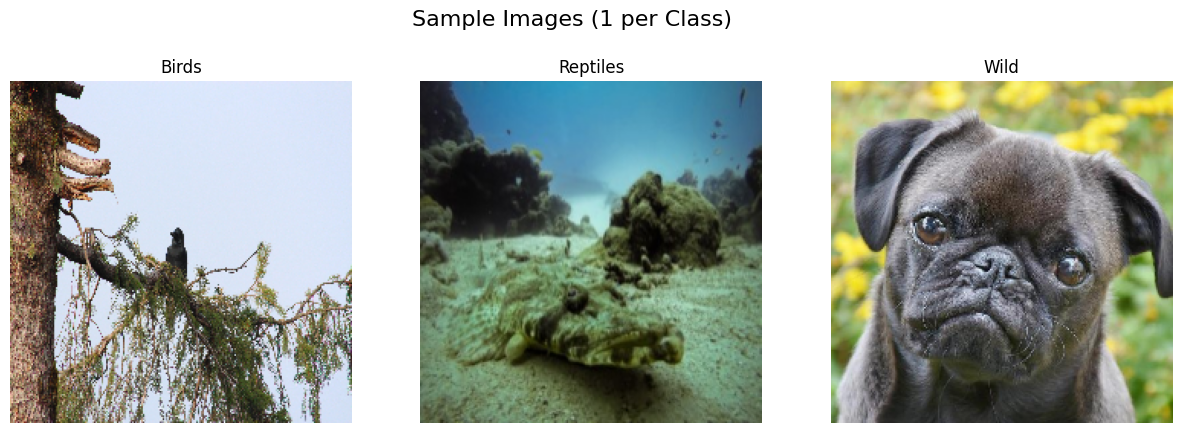

In [95]:
import os
import cv2
import random
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

input_dir = r"C:\Users\Adminlabpc-02\Downloads\Database\Animals"
img_size = (224, 224)
blur_threshold = 100.0  # Laplacian variance threshold

# Check if image is blurry 
def is_blurry(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    lap_var = cv2.Laplacian(gray, cv2.CV_64F).var()
    return lap_var < blur_threshold

# Collect and filter images
images_by_class = defaultdict(list)

for class_name in os.listdir(input_dir):
    class_path = os.path.join(input_dir, class_name)
    if not os.path.isdir(class_path): continue

    for root, _, files in os.walk(class_path):
        for file in files:
            if file.lower().endswith(('.jpg', '.jpeg', '.png')):
                img_path = os.path.join(root, file)

                img = cv2.imread(img_path)
                if img is None or is_blurry(img): continue

                img_resized = cv2.resize(img, img_size)
                images_by_class[class_name].append(img_resized)

# Pick one random image from 3 different classes 
sample_classes = list(images_by_class.keys())[:3]
samples = [(cls, random.choice(images_by_class[cls])) for cls in sample_classes]

plt.figure(figsize=(15, 5))
for idx, (cls, img) in enumerate(samples):
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(1, 3, idx + 1)
    plt.imshow(img_rgb)
    plt.title(cls)
    plt.axis('off')

plt.suptitle("Sample Images (1 per Class)", fontsize=16)
plt.show()


Total images loaded: 15742
Classes found: ['Birds' 'Reptiles' 'Wild']
Epoch 1/10
394/394 [==============================] - 33s 78ms/step - loss: 1.2016 - accuracy: 0.6003 - val_loss: 0.7156 - val_accuracy: 0.6161
Epoch 2/10
394/394 [==============================] - 30s 75ms/step - loss: 0.7028 - accuracy: 0.6165 - val_loss: 0.6955 - val_accuracy: 0.6148
Epoch 3/10
394/394 [==============================] - 30s 75ms/step - loss: 0.6970 - accuracy: 0.6155 - val_loss: 0.6912 - val_accuracy: 0.6205
Epoch 4/10
394/394 [==============================] - 30s 76ms/step - loss: 0.6971 - accuracy: 0.6150 - val_loss: 0.6950 - val_accuracy: 0.6148
Epoch 5/10
394/394 [==============================] - 30s 75ms/step - loss: 0.6980 - accuracy: 0.6147 - val_loss: 0.6953 - val_accuracy: 0.6151
Epoch 6/10
394/394 [==============================] - 30s 76ms/step - loss: 0.6968 - accuracy: 0.6165 - val_loss: 0.6951 - val_accuracy: 0.6151
Epoch 7/10
394/394 [==============================] - 30s 76ms/ste

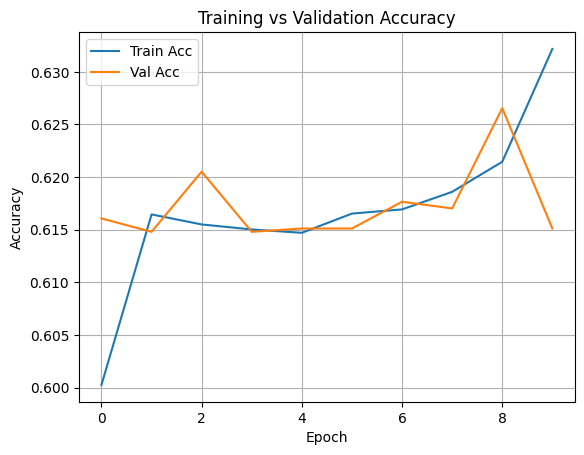

In [97]:
import os
import cv2
import numpy as np
import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt

input_dir = r"C:\Users\Adminlabpc-02\Downloads\Database\Animals"
img_size = (96, 96)  # Smaller to reduce memory
blur_threshold = 100.0

def is_blurry(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    lap_var = cv2.Laplacian(gray, cv2.CV_64F).var()
    return lap_var < blur_threshold

def load_images(input_dir):
    X, y = [], []

    for class_name in os.listdir(input_dir):
        class_path = os.path.join(input_dir, class_name)
        if not os.path.isdir(class_path): continue

        for root, _, files in os.walk(class_path):
            for file in files:
                if file.lower().endswith(('.jpg', '.jpeg', '.png')):
                    img_path = os.path.join(root, file)
                    img = cv2.imread(img_path)
                    if img is None or is_blurry(img): continue

                    img_resized = cv2.resize(img, img_size)
                    img_flattened = img_resized.astype('float32').flatten() / 255.0
                    X.append(img_flattened)
                    y.append(class_name)

    return np.array(X, dtype=np.float32), np.array(y)

X, y = load_images(input_dir)

print(f"Total images loaded: {len(X)}")
print(f"Classes found: {np.unique(y)}")

encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)

#Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42, stratify=y_encoded)

#Build model
model = Sequential([
    Dense(256, activation='relu', input_shape=(X.shape[1],)),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(y_categorical.shape[1], activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#Train
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)

loss, acc = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {acc:.4f}")

plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training vs Validation Accuracy")
plt.grid(True)
plt.show()


In [99]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_encoded = le.fit_transform(y)


In [100]:
from sklearn.preprocessing import LabelEncoder

# Encode labels if not done before
le = LabelEncoder()
y_encoded = le.fit_transform(y)


In [101]:
import joblib
import os
from tensorflow.keras.models import load_model

# Create output folder
save_dir = "trained_model_animals"
os.makedirs(save_dir, exist_ok=True)

# Save model
model_path = os.path.join(save_dir, "animal_classifier.h5")
model.save(model_path)
print(f"Model saved to: {model_path}")

# Save label encoder
encoder_path = os.path.join(save_dir, "label_encoder.pkl")
joblib.dump(le, encoder_path)
print(f"Label encoder saved to: {encoder_path}")

# Save class names
class_names_path = os.path.join(save_dir, "class_names.txt")
with open(class_names_path, "w") as f:
    for class_name in le.classes_:
        f.write(class_name + "\n")
print(f"Class names saved to: {class_names_path}")


c:\Users\Adminlabpc-02\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved to: trained_model_animals\animal_classifier.h5
Label encoder saved to: trained_model_animals\label_encoder.pkl
Class names saved to: trained_model_animals\class_names.txt


In [107]:
import torch
import torch.nn as nn

class CatClassifier(nn.Module):
    def __init__(self):
        super(CatClassifier, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.fc1 = nn.Linear(32 * 64 * 64, 128)  # Adjust based on image size after conv layers
        self.fc2 = nn.Linear(128, 2)  # Example: binary classification (cat vs not cat)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = x.view(-1, 32 * 64 * 64)  # Flatten the tensor
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x


In [110]:
class CatClassifier(nn.Module):
    def __init__(self):
        super(CatClassifier, self).__init__()
        # Adjust the first convolutional layer to match the saved weights
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=64, kernel_size=7, stride=2, padding=3)
        # Add the rest of your model layers here (match the saved model's architecture)
        # For example:
        self.fc1 = nn.Linear(64, 100)
        self.fc2 = nn.Linear(100, 10)  # Adjust these based on your model's saved configuration
        # etc.

    def forward(self, x):
        x = self.conv1(x)
        # Define forward pass for the rest of the layers
        return x


In [112]:
model = CatClassifier()
pretrained_dict = torch.load("cat_classifier.pth")
model_dict = model.state_dict()

# Filter out unnecessary keys
pretrained_dict = {k: v for k, v in pretrained_dict.items() if k in model_dict}

# Overwrite existing entries in the model state_dict
model_dict.update(pretrained_dict)
model.load_state_dict(model_dict)
model.eval()


C:\Users\Adminlabpc-02\AppData\Local\Temp\ipykernel_57728\3704934154.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  pretrained_dict = torch.load("cat_classifier.pth")


CatClassifier(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3))
  (fc1): Linear(in_features=64, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=10, bias=True)
)

In [122]:
import tkinter as tk

class CatDiseaseClassifierApp:
    def __init__(self, root):
        self.root = root
        self.root.title("Cat Disease Classifier")
        
        # Instruction Label
        self.instruction_label = tk.Label(root, text="How do you intend to analyse?", font=("Helvetica", 14))
        self.instruction_label.pack(pady=20)

        # Option Buttons
        self.symptoms_button = tk.Button(root, text="Symptoms", font=("Helvetica", 12))
        self.symptoms_button.pack(pady=10)
        
        self.image_button = tk.Button(root, text="Upload Image", font=("Helvetica", 12))
        self.image_button.pack(pady=10)
        
        self.both_button = tk.Button(root, text="Both Symptoms and Image", font=("Helvetica", 12))
        self.both_button.pack(pady=10)

# Running the application
if __name__ == "__main__":
    root = tk.Tk()
    app = CatDiseaseClassifierApp(root)
    root.geometry("400x300")  # Set window size for better visibility
    root.mainloop()

In [135]:
print("X_train shape:", X_train.shape)
print("X_train type:", type(X_train))


X_train shape: (10,)
X_train type: <class 'numpy.ndarray'>


In [136]:
# Convert array-of-arrays to a proper 4D array
X_train = np.stack(X_train)
X_test = np.stack(X_test)

print("After stacking:")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)


After stacking:
X_train shape: (10,)
X_test shape: (3,)


In [138]:
print("First few elements in X_train:", X_train[:5])  # See what is inside X_train


First few elements in X_train: ['itchiness' 'chin swelling' 'scaly skin' 'circular lesions' 'tiny bites']


In [144]:
import tkinter as tk
from tkinter import messagebox, filedialog
import random
import torch
import torchvision.models as models
from torchvision.models import ResNet18_Weights
import torchvision.transforms as transforms
from PIL import Image
import numpy as np
import tensorflow as tf
import joblib
import os

class CatDiseaseClassifierApp:
    def __init__(self, root):
        self.root = root
        self.root.title("Cat Disease Classifier")
        self.root.geometry("400x300")

        # Disease-symptom dictionary and class names for ResNet18
        self.disease_symptoms = {
            'Cat Ringworm.v10i.paligemma': ['Circular patches of hair loss', 'Itchy skin', 'Redness', 'Scaling'],
            'cat ringworm.v1i.paligemma': ['Hair loss', 'Redness', 'Rash'],
            'cat ringworm.v2i.paligemma': ['Itching', 'Scaly patches'],
            'Cat Ringworm.v2i.paligemma (1)': ['Lesions', 'Redness', 'Hair loss'],
            'cat ringworm.v3i.paligemma': ['Dry skin', 'Bald patches'],
            'Cat Ringworm.v4-2024-11-14-10-14am.paligemma': ['Crusty patches', 'Hair thinning'],
            'Cat Ringworm.v9i.paligemma': ['Patches of hair loss', 'Scabs'],
            'CatBot Baru.v2i.paligemma': ['Fever', 'Lethargy', 'Loss of appetite'],
            'CatBot Baru.v4i.paligemma': ['Cough', 'Sore throat', 'Loss of appetite'],
            'CatBot Baru.v5i.paligemma': ['Fatigue', 'Vomiting', 'Loss of appetite'],
            'CatBot Baru.v7i.paligemma': ['Respiratory issues', 'Coughing', 'Sneezing']
        }
        self.class_names = list(self.disease_symptoms.keys())

        # Unique symptoms plus "Not sure"
        all_symptoms = set()
        for symptoms in self.disease_symptoms.values():
            all_symptoms.update(symptoms)
        self.symptoms = sorted(list(all_symptoms)) + ['Not sure']

        # Load ResNet18 model
        try:
            self.cat_model = models.resnet18(weights=ResNet18_Weights.IMAGENET1K_V1)
            num_classes = len(self.class_names)
            self.cat_model.fc = torch.nn.Linear(self.cat_model.fc.in_features, num_classes)
            self.cat_model.load_state_dict(torch.load(r"C:\Users\Adminlabpc-02\Downloads\Database\cat_classifier.pth"))
            self.cat_model.eval()
            print("Cat disease model loaded.")
        except Exception as e:
            messagebox.showerror("Error", f"Failed to load cat_classifier.pth: {str(e)}")
            self.cat_model = None

        # Load Keras animal classifier
        try:
            self.animal_model = tf.keras.models.load_model(r"C:\Users\Adminlabpc-02\Downloads\Database\trained_model_animals\animal_classifier.h5")
            self.label_encoder = joblib.load(r"C:\Users\Adminlabpc-02\Downloads\Database\trained_model_animals\label_encoder.pkl")
            with open(r"C:\Users\Adminlabpc-02\Downloads\Database\trained_model_animals\class_names.txt", "r") as f:
                self.animal_classes = [line.strip() for line in f]
            print("Animal classifier model loaded.")
        except Exception as e:
            messagebox.showerror("Error", f"Failed to load animal_classifier.h5 or related files: {str(e)}")
            self.animal_model = None

        # Image preprocessing for ResNet18
        self.transform = transforms.Compose([
            transforms.Resize((224, 224)),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
        ])

        # Image preprocessing for Keras model
        self.keras_preprocess = lambda img: np.expand_dims(np.array(img.resize((224, 224))) / 255.0, axis=0)

        # Main frame
        self.main_frame = tk.Frame(self.root)
        self.main_frame.pack(expand=True)

        self.instruction_label = tk.Label(self.main_frame, text="How do you intend to analyse?", font=("Helvetica", 14))
        self.instruction_label.pack(pady=20)

        self.symptoms_button = tk.Button(self.main_frame, text="Symptoms", font=("Helvetica", 12), command=self.show_symptoms)
        self.symptoms_button.pack(pady=10)

        self.image_button = tk.Button(self.main_frame, text="Upload Image", font=("Helvetica", 12), command=self.show_image_upload)
        self.image_button.pack(pady=10)

        self.both_button = tk.Button(self.main_frame, text="Both Symptoms and Image", font=("Helvetica", 12), command=self.show_both)
        self.both_button.pack(pady=10)

        # Symptoms frame
        self.symptoms_frame = tk.Frame(self.root)

        self.symptom_label = tk.Label(self.symptoms_frame, text="Select Symptoms", font=("Helvetica", 12))
        self.symptom_label.pack(pady=10)

        self.selected_symptoms = tk.Listbox(self.symptoms_frame, selectmode=tk.MULTIPLE, height=10, font=("Helvetica", 10))
        scrollbar = tk.Scrollbar(self.symptoms_frame, orient=tk.VERTICAL)
        self.selected_symptoms.config(yscrollcommand=scrollbar.set)
        scrollbar.config(command=self.selected_symptoms.yview)
        for symptom in self.symptoms:
            self.selected_symptoms.insert(tk.END, symptom)
        self.selected_symptoms.pack(side=tk.LEFT, pady=10)
        scrollbar.pack(side=tk.RIGHT, fill=tk.Y)

        self.select_all_button = tk.Button(self.symptoms_frame, text="Select All", command=self.select_all, font=("Helvetica", 10))
        self.select_all_button.pack(pady=5)

        self.submit_button = tk.Button(self.symptoms_frame, text="Submit", command=self.submit_symptoms, font=("Helvetica", 10))
        self.submit_button.pack(pady=5)

        self.back_button = tk.Button(self.symptoms_frame, text="Back", command=self.show_main, font=("Helvetica", 10))
        self.back_button.pack(pady=5)

        # Image upload frame
        self.image_frame = tk.Frame(self.root)

        self.image_label = tk.Label(self.image_frame, text="Upload an Image", font=("Helvetica", 12))
        self.image_label.pack(pady=10)

        self.upload_button = tk.Button(self.image_frame, text="Select Image", command=self.upload_image, font=("Helvetica", 10))
        self.upload_button.pack(pady=10)

        self.image_back_button = tk.Button(self.image_frame, text="Back", command=self.show_main, font=("Helvetica", 10))
        self.image_back_button.pack(pady=10)

        # Both symptoms and image frame
        self.both_frame = tk.Frame(self.root)

        self.both_label = tk.Label(self.both_frame, text="Select Symptoms and Upload Image", font=("Helvetica", 12))
        self.both_label.pack(pady=10)

        self.both_symptoms = tk.Listbox(self.both_frame, selectmode=tk.MULTIPLE, height=8, font=("Helvetica", 10))
        both_scrollbar = tk.Scrollbar(self.both_frame, orient=tk.VERTICAL)
        self.both_symptoms.config(yscrollcommand=both_scrollbar.set)
        both_scrollbar.config(command=self.both_symptoms.yview)
        for symptom in self.symptoms:
            self.both_symptoms.insert(tk.END, symptom)
        self.both_symptoms.pack(side=tk.LEFT, pady=5)
        both_scrollbar.pack(side=tk.RIGHT, fill=tk.Y)

        self.both_select_all_button = tk.Button(self.both_frame, text="Select All", command=self.both_select_all, font=("Helvetica", 10))
        self.both_select_all_button.pack(pady=5)

        self.both_upload_button = tk.Button(self.both_frame, text="Select Image", command=self.both_upload_image, font=("Helvetica", 10))
        self.both_upload_button.pack(pady=5)

        self.both_submit_button = tk.Button(self.both_frame, text="Submit", command=self.submit_both, font=("Helvetica", 10))
        self.both_submit_button.pack(pady=5)

        self.both_back_button = tk.Button(self.both_frame, text="Back", command=self.show_main, font=("Helvetica", 10))
        self.both_back_button.pack(pady=5)

        # Variable to store image path for both interface
        self.both_image_path = None

    def show_symptoms(self):
        """Show the symptoms selection frame."""
        self.main_frame.pack_forget()
        self.image_frame.pack_forget()
        self.both_frame.pack_forget()
        self.symptoms_frame.pack(expand=True)

    def show_image_upload(self):
        """Show the image upload frame."""
        self.main_frame.pack_forget()
        self.symptoms_frame.pack_forget()
        self.both_frame.pack_forget()
        self.image_frame.pack(expand=True)

    def show_both(self):
        """Show the both symptoms and image frame."""
        self.main_frame.pack_forget()
        self.symptoms_frame.pack_forget()
        self.image_frame.pack_forget()
        self.both_frame.pack(expand=True)
        self.both_image_path = None  # Reset image path

    def show_main(self):
        """Return to the main interface."""
        self.symptoms_frame.pack_forget()
        self.image_frame.pack_forget()
        self.both_frame.pack_forget()
        self.main_frame.pack(expand=True)
        self.selected_symptoms.selection_clear(0, tk.END)
        self.both_symptoms.selection_clear(0, tk.END)
        self.both_image_path = None

    def select_all(self):
        """Select all symptoms in the symptoms listbox."""
        self.selected_symptoms.selection_clear(0, tk.END)
        for i in range(len(self.symptoms)):
            self.selected_symptoms.select_set(i)

    def both_select_all(self):
        """Select all symptoms in the both interface listbox."""
        self.both_symptoms.selection_clear(0, tk.END)
        for i in range(len(self.symptoms)):
            self.both_symptoms.select_set(i)

    def both_upload_image(self):
        """Open file dialog to select an image for both interface."""
        file_path = filedialog.askopenfilename(filetypes=[("Image Files", "*.jpg;*.jpeg;*.png")])
        if file_path:
            self.both_image_path = file_path
            messagebox.showinfo("File Selected", f"Selected image: {file_path}")
        else:
            self.both_image_path = None
            messagebox.showwarning("No File", "No image selected.")

    def upload_image(self):
        """Open file dialog and classify the image."""
        file_path = filedialog.askopenfilename(filetypes=[("Image Files", "*.jpg;*.jpeg;*.png")])
        if not file_path:
            messagebox.showwarning("No File", "No image selected.")
            return

        try:
            img = Image.open(file_path).convert('RGB')
            
            if self.animal_model:
                img_processed = self.keras_preprocess(img)
                animal_pred = self.animal_model.predict(img_processed)
                animal_class_idx = np.argmax(animal_pred, axis=1)[0]
                animal_class = self.animal_classes[animal_class_idx]
                
                if animal_class.lower() != 'cat':
                    messagebox.showinfo("Not a Cat", "Sorry, this does not look like a cat.")
                    return

            if self.cat_model:
                img_tensor = self.transform(img).unsqueeze(0)
                with torch.no_grad():
                    outputs = self.cat_model(img_tensor)
                    probabilities = torch.softmax(outputs, dim=1)
                    max_prob, predicted_idx = torch.max(probabilities, 1)
                    confidence = max_prob.item()
                
                if confidence > 0.5:
                    predicted_disease = self.class_names[predicted_idx.item()]
                    messagebox.showinfo("Diagnosis", f"Your cat has {predicted_disease}. Please see a doctor.")
                else:
                    messagebox.showinfo("Diagnosis", "Unable to detect illness, please double check with your vet.")
            else:
                messagebox.showinfo("Error", "Cat disease model not loaded.")
        except Exception as e:
            messagebox.showerror("Error", f"Failed to process image: {str(e)}")

    def submit_symptoms(self):
        """Diagnose disease based on selected symptoms."""
        selected_indices = self.selected_symptoms.curselection()
        if not selected_indices:
            messagebox.showwarning("No Selection", "Please select at least one symptom or 'Not sure'.")
            return

        selected_symptoms = [self.symptoms[i] for i in selected_indices]

        if 'Not sure' in selected_symptoms:
            messagebox.showinfo("Diagnosis", "Your cat is probably ok but check with the vet to be sure.")
            return

        for disease, symptoms in self.disease_symptoms.items():
            if all(symptom in selected_symptoms for symptom in symptoms):
                messagebox.showinfo("Diagnosis", f"Your cat has {disease}. Please see a doctor.")
                return

        partial_matches = []
        for disease, symptoms in self.disease_symptoms.items():
            if len(symptoms) == 3:
                matched = sum(1 for symptom in symptoms if symptom in selected_symptoms)
                if matched == 2:
                    partial_matches.append(disease)
        if partial_matches:
            chosen_disease = random.choice(partial_matches)
            messagebox.showinfo("Diagnosis", f"Your cat has {chosen_disease}. Please see a doctor.")
            return

        messagebox.showinfo("Diagnosis", "Your cat is probably ok but check with the vet to be sure.")

    def submit_both(self):
        """Diagnose disease based on symptoms and image."""
        selected_indices = self.both_symptoms.curselection()
        selected_symptoms = [self.symptoms[i] for i in selected_indices] if selected_indices else []
        
        if not selected_symptoms and not self.both_image_path:
            messagebox.showwarning("No Input", "Please select at least one symptom or upload an image.")
            return

        # Process image if uploaded
        if self.both_image_path:
            try:
                img = Image.open(self.both_image_path).convert('RGB')
                
                if self.animal_model:
                    img_processed = self.keras_preprocess(img)
                    animal_pred = self.animal_model.predict(img_processed)
                    animal_class_idx = np.argmax(animal_pred, axis=1)[0]
                    animal_class = self.animal_classes[animal_class_idx]
                    
                    if animal_class.lower() != 'cat':
                        messagebox.showinfo("Not a Cat", "Sorry, this does not look like a cat.")
                        return

                if self.cat_model:
                    img_tensor = self.transform(img).unsqueeze(0)
                    with torch.no_grad():
                        outputs = self.cat_model(img_tensor)
                        probabilities = torch.softmax(outputs, dim=1)
                        max_prob, predicted_idx = torch.max(probabilities, 1)
                        confidence = max_prob.item()
                    
                    if confidence > 0.5:
                        predicted_disease = self.class_names[predicted_idx.item()]
                        messagebox.showinfo("Diagnosis", f"Your cat has {predicted_disease}. Please see a doctor.")
                        return
            except Exception as e:
                messagebox.showerror("Error", f"Failed to process image: {str(e)}")
                # Continue to symptom-based diagnosis if image fails

        # Symptom-based diagnosis if no image or image-based diagnosis fails
        if selected_symptoms:
            if 'Not sure' in selected_symptoms:
                messagebox.showinfo("Diagnosis", "Your cat is probably ok but check with the vet to be sure.")
                return

            for disease, symptoms in self.disease_symptoms.items():
                if all(symptom in selected_symptoms for symptom in symptoms):
                    messagebox.showinfo("Diagnosis", f"Your cat has {disease}. Please see a doctor.")
                    return

            partial_matches = []
            for disease, symptoms in self.disease_symptoms.items():
                if len(symptoms) == 3:
                    matched = sum(1 for symptom in symptoms if symptom in selected_symptoms)
                    if matched == 2:
                        partial_matches.append(disease)
            if partial_matches:
                chosen_disease = random.choice(partial_matches)
                messagebox.showinfo("Diagnosis", f"Your cat has {chosen_disease}. Please see a doctor.")
                return

        messagebox.showinfo("Diagnosis", "Your cat is probably ok but check with the vet to be sure.")

if __name__ == "__main__":
    root = tk.Tk()
    app = CatDiseaseClassifierApp(root)
    root.mainloop()

C:\Users\Adminlabpc-02\AppData\Local\Temp\ipykernel_57728\4189401490.py:47: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.cat_model.load_state_dict(torch.load(r"C:\User